In [15]:
#Author: Laura C. Larregui
#Purpose: Week 2 Code Review

# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

# read in Dodgers bobbleheads data and create data frame
dodgers = pd.read_csv("C:\\Users\\laura\\OneDrive\\Documents\\Syracuse iSchool\\IST 718\\Repos\\IST_718\\dodgers.csv")

print(dodgers.describe())
#print(dodgers.info)

#The following code id the data cleanup made in the Jupyter Notebook presented in the Async Video

dodgerDF = pd.DataFrame(dodgers)

dodgers['attend_000'] = dodgers['attend']/1000
mondays = dodgers[dodgers['day_of_week'] == 'Monday']
tuesdays = dodgers[dodgers['day_of_week'] == 'Tuesday']
wednesdays = dodgers[dodgers['day_of_week'] == 'Wednesday']
thursdays = dodgers[dodgers['day_of_week'] == 'Thursday']
fridays = dodgers[dodgers['day_of_week'] == 'Friday']
saturdays = dodgers[dodgers['day_of_week'] == 'Saturday']
sundays = dodgers[dodgers['day_of_week'] == 'Sunday']

# convert days' attendance into list of vectors for box plot
data = [mondays['attend_000'], tuesdays['attend_000'], 
    wednesdays['attend_000'], thursdays['attend_000'], 
    fridays['attend_000'], saturdays['attend_000'], 
    sundays['attend_000']]
ordered_day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

ordered_team_names = (sorted(set(dodgers['opponent']), reverse = True))


             day        attend       temp
count  81.000000     81.000000  81.000000
mean   16.135802  41040.074074  73.148148
std     9.605666   8297.539460   8.317318
min     1.000000  24312.000000  54.000000
25%     8.000000  34493.000000  67.000000
50%    15.000000  40284.000000  73.000000
75%    25.000000  46588.000000  79.000000
max    31.000000  56000.000000  95.000000


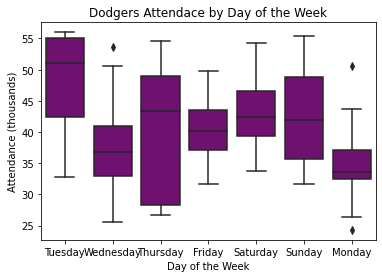

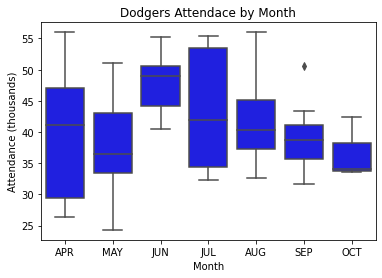

In [25]:
# Instructions: try to recreate  the graphics and the model from Chapter 2

# Mean
np.mean(dodgers['attend_000'])

#Figure 2.1: Dodgers Attendace by Day of the Week
sns.boxplot(x="day_of_week", y="attend_000", data=dodgers, color = "purple");
plt.title('Dodgers Attendace by Day of the Week')
plt.ylabel('Attendance (thousands)')
plt.xlabel('Day of the Week')
plt.show()

#Figure 2.2: Dodgers Attendace by Month
sns.boxplot(x="month", y="attend_000", data=dodgers, color = "blue");
plt.title('Dodgers Attendace by Month')
plt.ylabel('Attendance (thousands)')
plt.xlabel('Month')
plt.show()

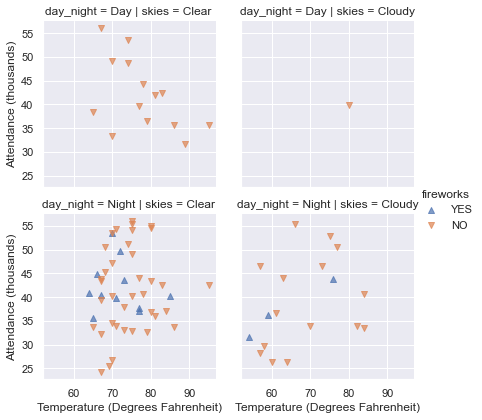

In [55]:
#Figure 2.3: Dodgers Weather, Fireworks, and Attendance

# trellis/lattice plot attendance by temp, conditioning on skies 
# and day_night with bobblehead NO/YES shown in distinct colors
import seaborn as sns

sns.set(style="darkgrid")

g = sns.FacetGrid(dodgers, col="skies",row="day_night", hue="fireworks", 
                  hue_order=["YES", "NO"],
                  hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "temp", "attend_000", alpha=.7)
g.add_legend();

g.set_axis_labels("Temperature (Degrees Fahrenheit)", "Attendance (thousands)")

plt.show()


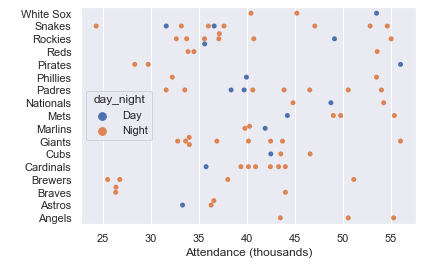

In [66]:
#Figure 2.4: Dodgers Attendance by Visiting Team
sns.swarmplot(x="attend_000", y="opponent", hue="day_night", 
              data=dodgers, order =ordered_team_names)

plt.xlabel('Attendance (thousands)')
plt.ylabel(' ')
g.add_legend(loc='lower right');
plt.show()

In [96]:
#Ordering data
# map day_of_week to ordered_day_of_week 
day_to_ordered_day = {
    'Monday' : '1Monday', 
    'Tuesday' : '2Tuesday', 
    'Wednesday' : '3Wednesday', 
    'Thursday' : '4Thursday', 
    'Friday' : '5Friday',
    'Saturday' : '6Saturday',
    'Sunday' : '7Sunday'}
dodgers['ordered_day_of_week'] = dodgers['day_of_week'].map(day_to_ordered_day)   

# map month to ordered_month
month_to_ordered_month = {
    'APR' : '1April', 
     'MAY' : '2May', 
     'JUN' : '3June', 
     'JUL' : '4July', 
     'AUG' : '5Aug',
     'SEP' : '6Sept'}
dodgers['ordered_month'] = dodgers['month'].map(month_to_ordered_month)  

In [97]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
dodgers['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(dodgers))
dodgers_train = dodgers[dodgers['runiform'] >= 0.33]#more than 1/3 of the dataset
dodgers_test = dodgers[dodgers['runiform'] < 0.33]#less than 1/3 of the dataset
# check training data frame
print('\ndodgers_train data frame (rows, columns): ',dodgers_train.shape)
print(dodgers_train.head())
# check test data frame
print('\ndodgers_test data frame (rows, columns): ',dodgers_test.shape)
print(dodgers_test.head())

# specify a simple model with bobblehead entered last
my_model = str('attend_000 ~ ordered_month + ordered_day_of_week + bobblehead')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = dodgers_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
dodgers_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
dodgers_test['predict_attend'] = train_model_fit.predict(dodgers_test)


dodgers_train data frame (rows, columns):  (57, 17)
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   
7   APR   24   44014     Tuesday   Braves    63  Cloudy     Night  NO    NO   

  fireworks bobblehead    division  attend_000  runiform ordered_day_of_week  \
1        NO         NO       Cross      29.729  0.622109          3Wednesday   
2        NO         NO       Cross      28.328  0.437728           4Thursday   
3       YES         NO       Cross      31.601  0.785359             5Friday   
4        NO         NO  Divisional      46.549  0.779976           6Saturday   
7        NO         NO  Divisional      44.014  0.801872            2Tue

<ipython-input-97-6b90c7be4325>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dodgers_train['predict_attend'] = train_model_fit.fittedvalues
<ipython-input-97-6b90c7be4325>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dodgers_test['predict_attend'] = train_model_fit.predict(dodgers_test)


In [98]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(dodgers_test['attend_000'].corr(dodgers_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model, data = dodgers).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of Bobblehead Promotion on Attendance: ',\
    round(my_model_fit.params[13],0))


Proportion of Test Set Variance Accounted for:  0.201
                            OLS Regression Results                            
Dep. Variable:             attend_000   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     6.262
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           3.40e-07
Time:                        12:19:16   Log-Likelihood:                -245.97
No. Observations:                  78   AIC:                             517.9
Df Residuals:                      65   BIC:                             548.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

IndexError: index out of bounds

<ipython-input-99-cd0957dbf8e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dodgers_test['set']='Test'
<ipython-input-99-cd0957dbf8e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dodgers_train['set']='Train'


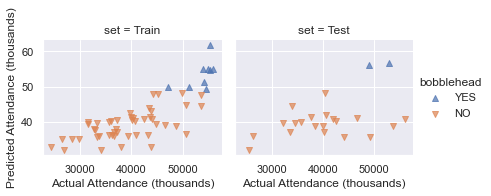

In [99]:
#Figure 2.5 Regression Model Performance: Bobbleheads and Attendance

#Add set column with Test/Train
dodgers_test['set']='Test'
dodgers_train['set']='Train'

#combine test/train to one set
combined_set = dodgers_test.append(dodgers_train, ignore_index=True)

g = sns.FacetGrid(combined_set, col="set", hue="bobblehead", 
                  hue_order=["YES", "NO"],
                  #reorder col
                  col_order=["Train","Test"],
                  hue_kws=dict(marker=["^", "v"]))

#rename axis
g.map(plt.scatter, "attend", "predict_attend",
      alpha=.7).set_axis_labels("Actual Attendance (thousands)",
                                "Predicted Attendance (thousands)")
g.add_legend();

#Add title, adjust subplots so its a little lower then add sup title
plt.subplots_adjust(top=0.75)
plt.show()